In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import drive
import os
import cv2

# Importing Dataset

In [ ]:
# Importing CSV from GitHub
sign_language_url = "https://raw.githubusercontent.com/emilyrshi/PIC16B_Project_Repo/6e27757ed9a716812ef7acfc855be8521285a464/SignLanguage_CSV/sign_language_dataset.csv"

sign_language_data = pd.read_csv(sign_language_url, index_col = False)
sign_language_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,Letter
0,0,58,57,58,57,58,57,109,60,60,...,196,81,31,22,16,13,9,7,6,D
1,1,58,58,58,58,57,57,108,59,58,...,195,184,33,21,16,13,9,7,6,D
2,2,59,57,57,57,58,58,107,60,59,...,197,190,34,21,18,14,9,7,6,D
3,3,60,60,60,59,58,59,110,61,60,...,49,36,26,20,16,14,10,8,6,D
4,4,60,59,60,60,60,60,110,62,61,...,41,31,24,19,17,14,10,8,7,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,95,101,103,107,109,110,111,113,115,117,...,82,86,72,62,45,38,30,37,118,W
696,96,101,104,108,110,112,114,113,115,117,...,113,89,74,63,44,37,30,34,116,W
697,97,101,104,109,110,110,113,114,115,115,...,116,88,70,61,42,39,71,124,106,W
698,98,101,104,108,110,113,113,114,116,117,...,115,91,73,63,46,44,33,80,54,W


# Data Cleaning and Preparation

In [ ]:
# Separate image features and target labels
X = sign_language_data.iloc[:, 1:785]
y = sign_language_data['Letter']

# Converting data to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

# Reshape input features into 4 dimensional tensor
X = X.reshape(-1, 28, 28, 1)

# Convert target labels to one-hot encoding
y = pd.get_dummies(y)
y = y.to_numpy()

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42) # random_State = 42

# CNN Model One

In [ ]:
cnn_one_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')  # number of classes (7 letters)
])

In [ ]:
# Compiling the model
cnn_one_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_one_history = cnn_one_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
18/18 [==============================] - 2s 17ms/step - loss: 11.9354 - accuracy: 0.1571 - val_loss: 2.1205 - val_accuracy: 0.2786
Epoch 2/20
18/18 [==============================] - 0s 7ms/step - loss: 1.8736 - accuracy: 0.2643 - val_loss: 1.6476 - val_accuracy: 0.3714
Epoch 3/20
18/18 [==============================] - 0s 7ms/step - loss: 1.5777 - accuracy: 0.4054 - val_loss: 1.4895 - val_accuracy: 0.4429
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 1.4264 - accuracy: 0.4482 - val_loss: 1.3364 - val_accuracy: 0.4929
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 1.1733 - accuracy: 0.5446 - val_loss: 1.2863 - val_accuracy: 0.4857
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 1.1094 - accuracy: 0.5964 - val_loss: 1.0439 - val_accuracy: 0.6071
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 0.8865 - accuracy: 0.6732 - val_loss: 0.9216 - val_accuracy: 0.6143
Epoch 8/20
18/18 [

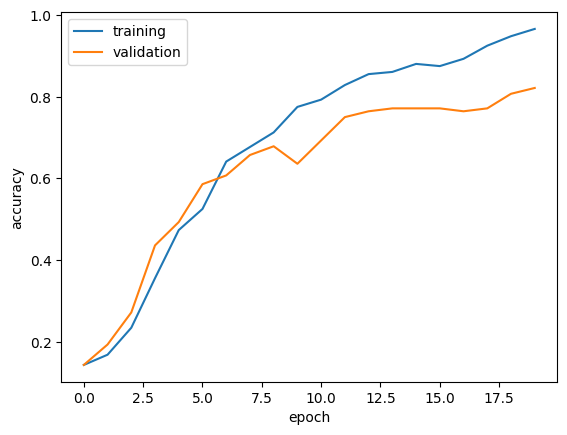

In [ ]:
plt.plot(cnn_one_history.history["accuracy"], label = "training")
plt.plot(cnn_one_history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

# CNN Model Two

In [ ]:
cnn_two_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')
])

In [ ]:
# Compiling the model
cnn_two_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_two_history = cnn_two_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
18/18 [==============================] - 4s 28ms/step - loss: 4.0880 - accuracy: 0.1429 - val_loss: 1.9233 - val_accuracy: 0.2000
Epoch 2/20
18/18 [==============================] - 0s 9ms/step - loss: 1.9738 - accuracy: 0.1821 - val_loss: 1.9091 - val_accuracy: 0.2143
Epoch 3/20
18/18 [==============================] - 0s 10ms/step - loss: 1.9177 - accuracy: 0.1893 - val_loss: 1.8299 - val_accuracy: 0.2500
Epoch 4/20
18/18 [==============================] - 0s 13ms/step - loss: 1.8486 - accuracy: 0.2321 - val_loss: 1.8046 - val_accuracy: 0.2214
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 1.8009 - accuracy: 0.2429 - val_loss: 1.7581 - val_accuracy: 0.3071
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 1.7463 - accuracy: 0.2875 - val_loss: 1.6367 - val_accuracy: 0.4357
Epoch 7/20
18/18 [==============================] - 0s 8ms/step - loss: 1.6592 - accuracy: 0.3304 - val_loss: 1.5396 - val_accuracy: 0.3857
Epoch 8/20
18/18 

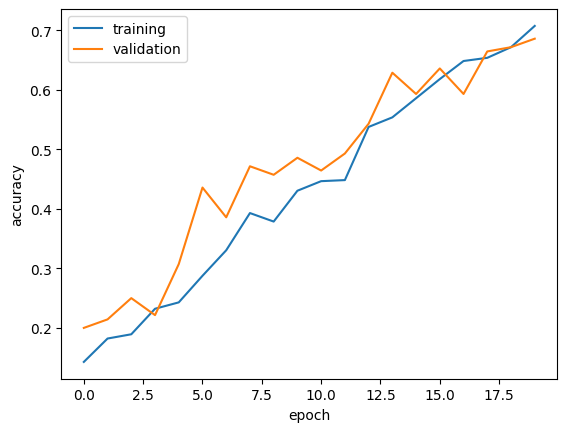

In [ ]:
plt.plot(cnn_two_history.history["accuracy"], label = "training")
plt.plot(cnn_two_history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

# CNN Model Three

In [ ]:
cnn_three_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')
])

In [ ]:
# Compiling the model
cnn_three_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_three_history = cnn_three_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
18/18 [==============================] - 2s 16ms/step - loss: 1.0606 - accuracy: 0.5643 - val_loss: 0.8935 - val_accuracy: 0.6429
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 0.9971 - accuracy: 0.5964 - val_loss: 0.8326 - val_accuracy: 0.7071
Epoch 3/20
18/18 [==============================] - 0s 6ms/step - loss: 0.9968 - accuracy: 0.5946 - val_loss: 0.8648 - val_accuracy: 0.6786
Epoch 4/20
18/18 [==============================] - 0s 8ms/step - loss: 0.9965 - accuracy: 0.6143 - val_loss: 0.9940 - val_accuracy: 0.6786
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 1.0422 - accuracy: 0.5821 - val_loss: 0.9601 - val_accuracy: 0.7071
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 0.9354 - accuracy: 0.5964 - val_loss: 0.8119 - val_accuracy: 0.7071
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 0.8013 - accuracy: 0.6946 - val_loss: 0.7878 - val_accuracy: 0.6571
Epoch 8/20
18/18 [=

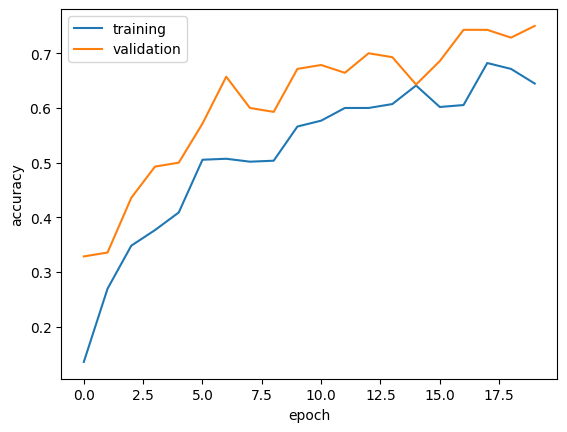

In [ ]:
plt.plot(cnn_three_history.history["accuracy"], label = "training")
plt.plot(cnn_three_history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

# **Evaluating Model on Testing Data**

In [ ]:
# Evaluate accuracy on testing
loss, accuracy = cnn_three_model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 4ms/step - loss: 0.8599 - accuracy: 0.6500


## **Classification on Unseen Image**

In [ ]:
import prediction
from prediction import load_image, predict_images

# Define labels
labels = {
    0: 'D',
    1: 'E',
    2: 'H',
    3: 'L',
    4: 'O',
    5: 'R',
    6: 'W'
}

# Specify directory containing images to predict
folder_dir = 'Models/PredictionImages'

# Assuming cnn_three_model is defined elsewhere
model = cnn_three_model

# Perform prediction
predict_images(folder_dir, model, labels)

1/1 [==============================] - 0s 109ms/step
Prediction for h_7b6067c6-e4a8-11ee-8084-663f80099ff1.jpg : H
1/1 [==============================] - 0s 29ms/step
Prediction for e_9fc64bee-e4a8-11ee-8084-663f80099ff1.jpg : H
1/1 [==============================] - 0s 27ms/step
Prediction for h_sign_lang.jpg : H
1/1 [==============================] - 0s 18ms/step
Prediction for w_sign_lang.jpg : H
1/1 [==============================] - 0s 22ms/step
Prediction for r_sign_lang.jpg : W
1/1 [==============================] - 0s 18ms/step
Prediction for o_1b6e9e90-e4a9-11ee-8084-663f80099ff1.jpg : O
1/1 [==============================] - 0s 20ms/step
Prediction for d_8a76b8b8-e4a9-11ee-8084-663f80099ff1.jpg : R
1/1 [==============================] - 0s 22ms/step
Prediction for o_1c119410-e4a9-11ee-8084-663f80099ff1.jpg : O
1/1 [==============================] - 0s 22ms/step
Prediction for e_a9eb739c-e4a8-11ee-8084-663f80099ff1.jpg : E
1/1 [==============================] - 0s 22ms/step
Pr